Initialize ACO sistem whith prob params
--

---
`params` is a dictionary that contains the following (key:value)
* alpha: importance of pheromone
* beta: importance of length
* intensity: pheromone intensity
* noAnts: number of ants from colony
* costs: dictionary of the graph where (key=node) and (value=list of lengths to other nodes)
* pheros: dictionary of the graph where (key=node) and (value=list of pheromone stored on edge to other nodes)
* repeatTest: how many times we throw ants randomly
* evap: evaporation coefficient

In [1]:
def changeGraph(costs, pheros):
    lenPlus=len(costs)+1
    costs[lenPlus]=[]
    costs[lenPlus].append([random.randint(1,10)for i in range(lenPlus-1)])
    pheros[lenPlus]=[]
    pheros[lenPlus].append([0.5 for i in range(lenPlus)])
    for i in range(lenPlus-1):
        costs[i+1].append(random.randint(1,50))
        pheros[i+1].append(0.5)
    costs[lenPlus]=costs[lenPlus][0]
    pheros[lenPlus]=pheros[lenPlus][0]
    costs[lenPlus].append(0)
    return costs,pheros


class ACO:
    def __init__(self,params):
        self.__params=params
        self.__alpha = params["alpha"]
        self.__beta=params["beta"]
        self.__intensity=params["intensity"]
        self.__noAnts=params["noAnts"]
        self.__graphCosts=params["costs"]
        self.__graphPheros=params["pheros"]
        self.__noRepeats=params["repeatTest"]
        self.__evap=params["evap"]
        self.__changeRoads=10
        self.__foodTimeBaby=False

    def solve(self):
        """
        Function that throws for a fixed number of iterations every ant
            in a random position in graph

        :param graph : graph of costs:
        :return: best road based on pheromones
        """

        for time in range(self.__noRepeats):
            myAntsList=[ANT(self.__params) for i in range(self.__noAnts)]
            if (self.__foodTimeBaby.__eq__(True)):
                    self.__graphCosts,self.__graphPheros=changeGraph(self.__graphCosts,self.__graphPheros)
                    self.__params["costs"]=self.__graphCosts
                    self.__params["pheros"]=self.__graphPheros
            for ant in myAntsList:
                if (self.__foodTimeBaby.__eq__(True)):
                    ant.workHarder(self.__params)
                for i in range(len(self.__graphCosts)-1):
                    ant._goNext()
                ant.updatePhero()
            self._updateAllPheros(myAntsList)
            if time==self.__changeRoads:
                self.__foodTimeBaby=True


        return self.__graphPheros

    def _updateAllPheros(self, myAntsList):
        generalPhero={}
        for ant in myAntsList:
            for edge in ant.getEdges():
                generalPhero[edge]=0
        for ant in myAntsList:
            for edge in ant.getEdges():
                generalPhero[edge]+=ant.getPhero()
        for node in self.__graphPheros:
            for toNode in range(len(self.__graphPheros)):
                self.__graphPheros[node][toNode]*=(1-self.__evap)

        for edge in generalPhero:
            self.__graphPheros[edge[0]][edge[1]-1]+=generalPhero[edge]


In [2]:
import random

class ANT:
    def __init__(self,params):
        self.__road=[]
        self.__phero=0
        #initialize the starting point
        self.__road.append(random.randint(1,len(params["costs"])))
        self.__acoParams=params
        self.__edgeVisited=[]

    def getPhero(self):
        return self.__phero

    def getEdges(self):
        return self.__edgeVisited

    def _goNext(self):
        graph=self.__acoParams["costs"]
        pheroGraph=self.__acoParams["pheros"]
        alhpa=self.__acoParams["alpha"]
        beta=self.__acoParams["beta"]
        probabilities={}
        fromNode=self.__road[-1:][0]
        sumOfPOS=0
        for i in range(len(graph)):
            toNode=i+1
            if not self.__road.__contains__(toNode):
                sumOfPOS+=(pow(pheroGraph[fromNode][toNode-1],alhpa)*pow(1/graph[fromNode][toNode-1],beta))

        for i in range(len(graph)):
            toNode=i+1
            if not self.__road.__contains__(toNode):
                probabilities[toNode]=(pow(pheroGraph[fromNode][toNode-1],alhpa)*pow(1/graph[fromNode][toNode-1],beta))/sumOfPOS
        selected=0
        while selected==0:
            roulete = random.uniform(0, 1)
            for toNode in probabilities:
                if len(probabilities) == 1:
                    selected=toNode
                    break
                if probabilities[toNode]<roulete:
                    selected=toNode
                    break
        self.__road.append(selected)

    def updatePhero(self):
        totalLength=self.getLenght()
        self.__phero=self.__acoParams["intensity"]/totalLength



    def getLenght(self):
        graph=self.__acoParams["costs"]
        length=0

        for nod in range(len(self.__road)-1):
            length+=graph[self.__road[nod]][self.__road[nod+1]-1]
            self.__edgeVisited.append((self.__road[nod],self.__road[nod+1]))
        return length

    def workHarder(self,params):
        self.__acoParams=params

In [3]:
def readData(data):
    dataFile=open(data,"r")
    tree={}
    phero={}
    n = int(dataFile.readline())
    for i in range(n):
        phero[i+1]=[]
    for i in range(n):
        [phero[i+1].append(0.5) for i in range(n)]
    for i in range(n):
        b = []
        line = dataFile.readline()
        line = line.split(",")
        for e in line:
            b.append(int(e))
        tree.__setitem__(i + 1, b)
    return tree,phero


def getBest(pheroTree):
    pass


MAIN
===

In [4]:
# * alpha: importance of pheromone
# * beta: importance of length
# * intensity: pheromone intensity
# * noAnts: number of ants from colony
# * costs: dictionary of the graph where (key=node) and (value=list of lengths to other nodes)
# * pheros: dictionary of the graph where (key=node) and (value=list of pheromone stored on edge to other nodes)
# * repeatTest: how many times we throw ants randomly
# * evap: evaporation coefficient
tree, pheroTree = readData("data/hard.txt")

props = {'alpha': 10.0, 'beta': 1.0, 'intensity': 1, 'noAnts': 100, 'costs': tree, 'pheros': pheroTree,
         'repeatTest': 14, 'evap': 0.5}
aco = ACO(props)
pheroTree = aco.solve()
# for edge in pheroTree:
#     print( pheroTree[edge])

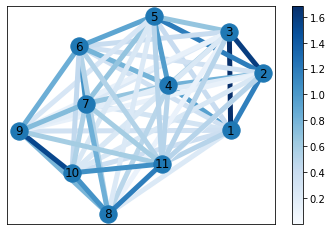

In [5]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

# create a graph using code from @jlarsch's answer
G = nx.Graph()
for i in range(len(pheroTree)):
    G.add_node(str(i+1))
for i in range(len(pheroTree)):
    for j in range(len(pheroTree)):
        G.add_edges_from([(str(i+1),str(j+1))],weight=(pheroTree[i+1][j]+pheroTree[j+1][i]))
# compute spring layout positions for the graph
pos = nx.spring_layout(G)
# nx.draw_networkx_edges returns an instance of
# `matplotlib.collections.LineCollection`, which
# could be passed to plt.colorbar to generate
# color bar
# the list comprehension to obtain edge weights is from @Aric's answer at
# https://stackoverflow.com/a/25651827/4638182
mcl = nx.draw_networkx_edges(
    G, pos, edge_cmap=cm.Blues, width=5,
    edge_color=[G[u][v]['weight'] for u, v in G.edges])
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
plt.colorbar(mcl)
plt.savefig("simple_path2.png")
plt.show()

In [6]:
def getROAD_AB(treeSource):

    coada = []
    listaParcurgere = []
    dimensiuneDrum = 0
    vizitati = []
    coada.append(random.randint(1,len(treeSource)))
    while len(coada):
        min = None
        vecinMinim = 0
        nodCurent = coada.pop()
        vizitati.append(nodCurent)
        listaParcurgere.append(nodCurent)
        for i in range(len(tree.__getitem__(nodCurent))):
            if not vizitati.__contains__(i + 1):
                if min is None:
                    min = tree.__getitem__(nodCurent)[i]
                    vecinMinim = i + 1
                else:
                    if tree.__getitem__(nodCurent)[i] < min:
                        min = tree.__getitem__(nodCurent)[i]
                        vecinMinim = i + 1
        if not len(vizitati) == len(tree.__getitem__(nodCurent)):
            coada.append(vecinMinim)
            dimensiuneDrum += tree.__getitem__(nodCurent)[vecinMinim - 1]
    return listaParcurgere, dimensiuneDrum
print(getROAD_AB(pheroTree))

([1, 3, 8, 4, 2, 7, 5, 6, 9, 11, 10], 44)
